In [1]:
#Importe la libreria de numpy, pandas y matplotlib, tensor flow y keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
#Imprima la version de tensorflow y keras y ptyhon
import sys
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)
print("Python version:", sys.version)


TensorFlow version: 2.19.0
Keras version: 3.10.0
Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]


In [3]:
#Importe del dataet de tensorflow el dataset de mnist y guardelos en las siguientes variables: (x_train, y_train), (x_test, y_test)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
#Imprima el numero de muestras de entrenamiento y de prueba
print("Número de muestras de entrenamiento:", len(x_train))
print("Número de muestras de prueba:", len(x_test))
#Imprima la forma de las imagenes de entrenamiento y de prueba
print("Forma de las imágenes de entrenamiento:", x_train.shape)
print("Forma de las imágenes de prueba:", x_test.shape)
#Imprima el numero de clases y las clases unicas
print("Número de clases:", len(np.unique(y_train)))
print("Clases únicas:", np.unique(y_train))



Número de muestras de entrenamiento: 60000
Número de muestras de prueba: 10000
Forma de las imágenes de entrenamiento: (60000, 28, 28)
Forma de las imágenes de prueba: (10000, 28, 28)
Número de clases: 10
Clases únicas: [0 1 2 3 4 5 6 7 8 9]


In [4]:
#Coloque el tipo de dato de x_train
print("Tipo de dato de x_train:", x_train.dtype)

Tipo de dato de x_train: uint8


In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

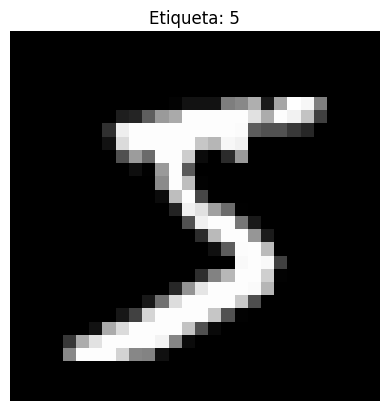

In [6]:
#Imprima la imagen del arreglo x_train[0]
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Etiqueta: {y_train[0]}")
plt.axis('off')
plt.show()


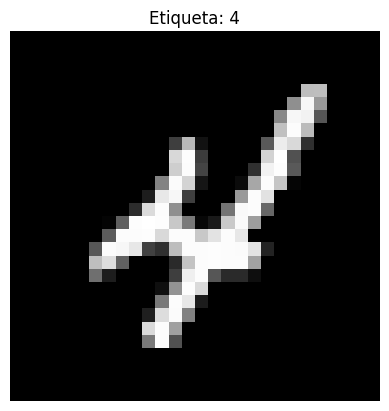

In [7]:
#Imprime la novena imagen del arreglo x_train[9]
plt.imshow(x_train[9], cmap='gray')
plt.title(f"Etiqueta: {y_train[9]}")
plt.axis('off')
plt.show()


In [8]:
print(y_train[9])

4


In [9]:
#Normaliza x_train y y_train dividiendo entre 255
x_train = x_train / 255.0
x_test = x_test / 255.0


In [10]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [11]:
!nvidia-smi

Fri Feb 27 20:24:27 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.82.07              Driver Version: 580.82.07      CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   58C    P8             13W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [12]:
#Agregue la variable perdida que es igual a la función de perdida de entropia cruzada sparse_categorical_crossentropy
loss = keras.losses.SparseCategoricalCrossentropy()

In [13]:
#El optimizador que se va a usar es el Adam con una tasa de aprendizaje de 0.1
optimizer = keras.optimizers.Adam(learning_rate=0.03)


In [14]:
#Cree una variable llamada metrica donde el validador va a ser acuracy
metrica = keras.metrics.SparseCategoricalAccuracy()


In [15]:
#Crea un grafo de una red neuronal con la siguiente arquitectura: nombre de la variable es mi_modelo, es un modelo secuencial denso, coloque una entrada de teniendo en cuenta que la forma de la imagen es de 28x28, cree una capa flatten para aplanar la imagen, cree una capa densa de 32 unidades con la función de activación relu, cree una capa densa de 16 unidades con la función de activación relu, y la capa de salida va a tener 10 unidades con la funcion de activación linear
mi_modelo = keras.Sequential([
    keras.layers.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(10, activation='linear')
])
#Compile el modelo con la función de perdida, el optimizador y la metrica que se crearon anteriormente
mi_modelo.compile(loss=loss, optimizer=optimizer, metrics=[metrica])
#Entrene el modelo con x_train y y_train, con un batch size de 32 y 10 epochs
mi_modelo.fit(x_train, y_train, batch_size=32, epochs=15)
#Evalua el modelo con x_test y y_test
test_loss, test_acc = mi_modelo.evaluate(x_test, y_test)
print("Pérdida en el conjunto de prueba:", test_loss)
print("Precisión en el conjunto de prueba:", test_acc)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 12.8964 - sparse_categorical_accuracy: 0.1337
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 5.2859 - sparse_categorical_accuracy: 0.1311
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.3026 - sparse_categorical_accuracy: 0.1359
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.3026 - sparse_categorical_accuracy: 0.1368
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2.3026 - sparse_categorical_accuracy: 0.1332
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.3026 - sparse_categorical_accuracy: 0.1330
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.3026 - sparse_categorical_accuracy: 0.1357
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.3026 - sparse_categorical_accuracy: 0.1335
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.3026 - sparse_categorical_accuracy: 0.1347
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━

In [16]:
mi_modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,456 (302.57 KB)

 Trainable params: 25,818 (100.85 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 51,638 (201.71 KB)

In [19]:
#Dale persistencia al modelo con extension .keras y guardalo localmente
mi_modelo.save("/content/mi_modelo.keras")



In [21]:
#Decargar una copia del modelo guardado en google drive y guardalo en una variable llamada modelo_cargado
modelo_cargado = keras.models.load_model("/content/mi_modelo.keras")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


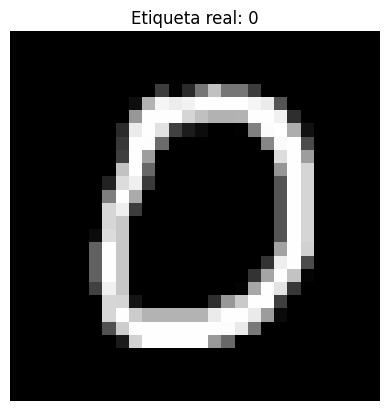

Vector de resultados (sin softmax): [[ -460.0381   -1293.407     -196.69629   -114.71314   -288.21732
   -473.43567   -223.8527     -95.231316  -403.29935   -319.54086 ]]


In [22]:
#Guardar en la variable prediccion la imagen que esta en x_test[10]. muestrame la imagen, prediga la etiqueta mostrando el vector de resultados. no aplique softmax
prediccion = modelo_cargado.predict(x_test[10].reshape(1, 28, 28))
plt.imshow(x_test[10], cmap='gray')
plt.title(f"Etiqueta real: {y_test[10]}")
plt.axis('off')
plt.show()
print("Vector de resultados (sin softmax):", prediccion)


In [26]:
#Convierta el logits a probabilidades en la prediccion utilizando la funcion softmax, muestre el numero la etiqueta y la probabilidad de el numero en la posicion 5000. convierta las probabilidades en porcentajes con un decimal y el simbolo de porcentaje
prediccion = modelo_cargado.predict(x_test[500].reshape(1, 28, 28))
probabilidades = tf.nn.softmax(prediccion).numpy()
numero_predicho = np.argmax(probabilidades)
probabilidad_numero = probabilidades[0][numero_predicho] * 100
print(f"Número predicho: {numero_predicho}")
print(f"Probabilidad del número predicho: {probabilidad_numero:.1f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Número predicho: 3
Probabilidad del número predicho: 99.7%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


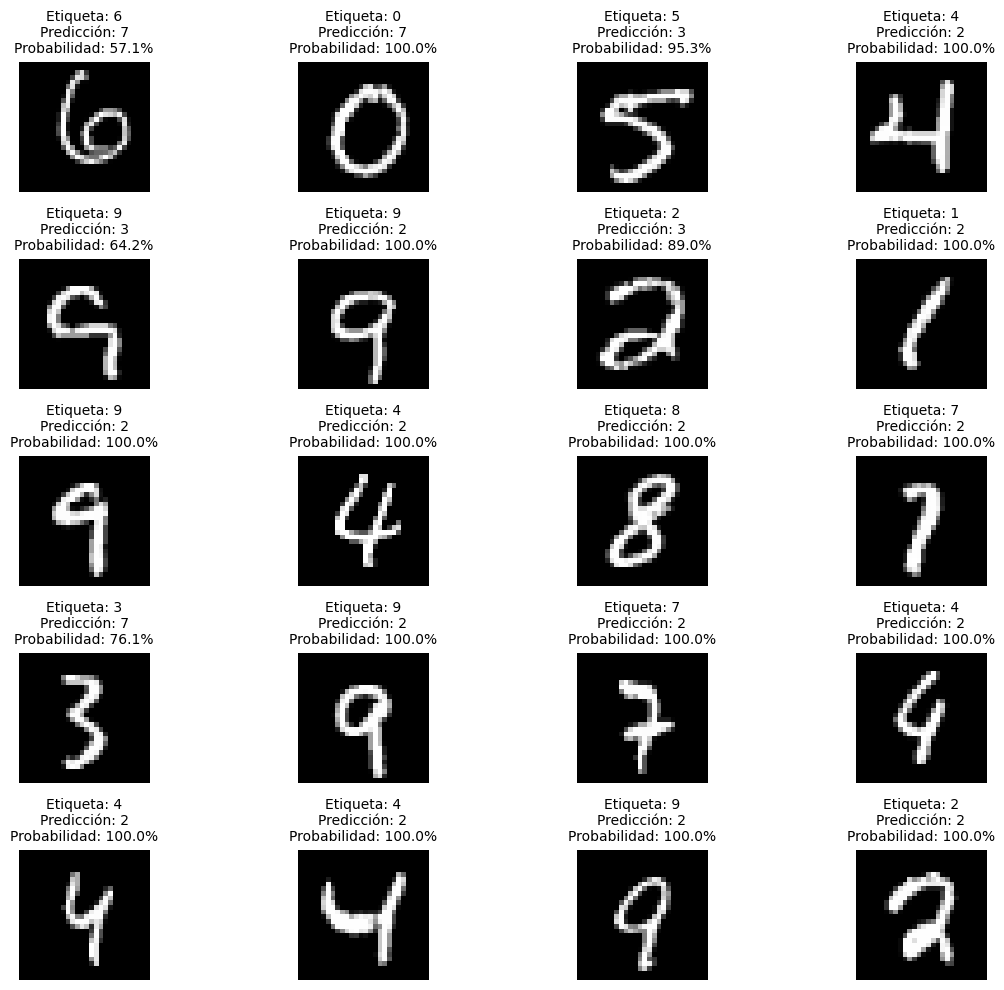

In [27]:
#imprima las imagenes de la posicion 100 a la 120 de x_test, haga la predicccion, coloque la etiqueta en la parte superior y en la parte inferior la probabilidad, organice los numeros en 4 columnas y 5 filas y ajusteme los textos
plt.figure(figsize=(12, 10))
for i in range(100, 120):
    plt.subplot(5, 4, i-99)
    plt.imshow(x_test[i], cmap='gray')
    prediccion = modelo_cargado.predict(x_test[i].reshape(1, 28, 28))
    probabilidades = tf.nn.softmax(prediccion).numpy()
    numero_predicho = np.argmax(probabilidades)
    probabilidad_numero = probabilidades[0][numero_predicho] * 100
    plt.title(f"Etiqueta: {y_test[i]}\nPredicción: {numero_predicho}\nProbabilidad: {probabilidad_numero:.1f}%", fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()


In [28]:
#Monte el google drive de la carpeta 'mi Unidad/numeros' en este cuaderno
from google.colab import drive
drive.mount('/content/drive')
 


Mounted at /content/drive


In [29]:
!ls -la

total 352
drwxr-xr-x 1 root root   4096 Feb 27 20:54 .
drwxr-xr-x 1 root root   4096 Feb 27 19:29 ..
drwxr-xr-x 4 root root   4096 Feb  6 14:31 .config
drwx------ 5 root root   4096 Feb 27 20:54 drive
-rw-r--r-- 1 root root 337812 Feb 27 20:30 mi_modelo.keras
drwxr-xr-x 1 root root   4096 Feb  6 14:31 sample_data


In [33]:
#Tengo 3 archivos llamados 4.jpg, nueve.jpg y tre.jpg en la carpeta numeros en google drive voy requerir cargar los archivos en arreglos de 28x28 en una matriz, si es necesario haga un reshape de 28x28, haga la prediccion de los numeros, coloque la etiqueta de la prediccion y la probabilidad de la etiqueta
import cv2
import os
carpeta_numeros = '/content/drive/My Drive/numeros'
imagenes = []
for archivo in os.listdir(carpeta_numeros):
    if archivo.endswith('.jpg'):
        ruta_imagen = os.path.join(carpeta_numeros, archivo)
        imagen = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)
        imagen = cv2.resize(imagen, (28, 28))
        imagen = imagen / 255.0
        imagenes.append(imagen)
imagenes = np.array(imagenes)
for i, imagen in enumerate(imagenes):
    prediccion = modelo_cargado.predict(imagen.reshape(1, 28, 28))
    probabilidades = tf.nn.softmax(prediccion).numpy()
    numero_predicho = np.argmax(probabilidades)
    probabilidad_numero = probabilidades[0][numero_predicho] * 100
    print(f"Imagen {i+1}: Predicción: {numero_predicho}, Probabilidad: {probabilidad_numero:.1f}%")
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Imagen 1: Predicción: 2, Probabilidad: 100.0%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Imagen 2: Predicción: 2, Probabilidad: 48.3%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Imagen 3: Predicción: 2, Probabilidad: 54.6%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Imagen 4: Predicción: 2, Probabilidad: 100.0%
